<a id='index'></a>
# APIs
- [requests](#requests)
- [json](#json)
- [exercise 1](#ex1)
- [exercise 2](#ex2)
- [requests continued](#requests2)
- [exercise 3](#ex3)
- [knmi api](#knmi)
- [exercise 4](#ex4)

### keuze
- [kiwis api](#kiwis)
- [kiwis exercise](#exkiwis)
- [hydronet api](#hydronet)
- [hydronet exercise](#hydronetex)

<a id='requests'></a>
[terug naar index](#index)
# requests
met ``requests`` kan je 'het web' bevragen, [documentatie](https://requests.kennethreitz.org/en/master/). met ```get``` zoals de naam ook al zegt krijg je iets terug. daarnaast heb je nog andere standaard HTTP requests deze gebruik je waarschijnlijk niet of minimaal.

In [1]:
import requests
r = requests.get('https://www.brabantsedelta.nl')
r.text[:1000] # eerste 1000 tekens van brabantsedelta website

'<!doctype html><html lang="nl" class=""><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta name="theme-color" content="#000000"><link rel="manifest" href="/manifest.json"><link rel="preconnect" href="https://www.simanalytics.nl"><link rel="preconnect" href="https://logging.simanalytics.nl"><link rel="preconnect" href="https://f1-eu.readspeaker.com"><link rel="preload" as="script" href="https://logging.simanalytics.nl/piwik.js"><title data-react-helmet="true">Home | Waterschap Brabantse Delta</title><link href="/static/css/2.ea8a15fe.chunk.css" rel="stylesheet"><link href="/static/css/main.daee0eca.chunk.css" rel="stylesheet"><link data-react-helmet="true" rel="stylesheet" href="https://fonts.googleapis.com/css?family=Nunito+Sans" data-theme="fonts"/><link data-react-helmet="true" rel="shortcut icon" href="/mgd/files/favicon-wsbd.png"/><meta data-react-helmet="true" name="title" content="Home"/><meta data-react-helmet="true" name="dcter

```r``` hierboven is een ```Response``` object, een ```Response``` object heeft verschillende ```methods```, hierboven zag je al ```text```, daarnaast heb je:
- ```encoding```, geeft de encoding terug;
- ```content```, geeft de content as bytes terug, bijv. als je een foto wil laden;
- ```json```, als je met ``json`` data werkt;
- ```status``` geeft de statuscode terug:
    - 100+ Mededelend
    - 200+ OK
    - 300+ Omleiding
    - 400+ Aanvraagfout
    - 500+ Serverfout

In [3]:
r = requests.get('http://media.giphy.com/media/xTiTnwVTjUsBJAMim4/giphy.gif', verify=False)
display(r.encoding)

None

In [4]:
display(r.content[:1000]) # eerste 1000 tekens van de gif

b'GIF89a\xe0\x01\xe0\x01\xf7\xfe\x00\r\x0c\x03\x13\x12\t\x14\x16\x0b\x15\x12\t\x18\x15\x0b\x1a\x16\x0b\x1a\x19\x0e\x1b\x1a\x0f\x1b\x1a\x10\x1e\x18\x0c\x1e\x1b\x0f\x1e\x1f\x12\x1f\x1c\x10\x1f\x1e\x11  \x14!\x19\x0c!\x1c\x10!\x1f\x12"\x1b\x0e"#\x16#\x1f\x12#"\x12$ \x14$!\x16%#\x16%%\x19(\x1e\x0f($\x18(\'\x17(\'\x1a((\x1c)"\x11)*\x1a*(\x16*(\x1d*,\x1c*,\x1e++\x1f+."-(\x1b-,\x1b.!\x11.\'\x15.- /-\x1f//#03%1$\x131,\x1d2*\x1720 20$33\x1f33"40!44$44&56*7\'\x147,\x177/\x1b86(9:+:6\'<*\x16<.\x1a<4\x1f=9%==,?3\x1d?<(A5\x1dB.\x18B4\x1bB>-CC/D.\x18D3\x12E7 E9"F=%G-\x18G6#IG3J5\x11J5\x19JA&JD.K9\x19K:"LL7M8\x12MH/N7 N9\x17O-\x1aO>\x18O>#P;\x13R;!R<\x14S?\x17S@!SF\'T<#T?\x19TC\'UL2V>%V?\x18VE-VS=W?*WD\x1eWL.WQ5WR9XC\x18XJ+YE*ZG\'ZP/ZS7[@\'[C([G\x19[I\x1f[S0[Z>\\=\x1f^G$_H\x19_L!`^CaF+aaLbI-bP-bT1bT7b\\;cJ\x1cdK1dZ3eN fR$fcDgK0hQ iQ1i^@ihLjS6k]:leDlmQmS#m_3oT7pN3qW$qoSrW9stWt]>t]@tmJu`7uvZvaCwjFyqJztN{z_~^;\x7f^A\x7fhG\x7f\x7fa\x80aD\x81i9\x83tM\x84hK\x84zR\x84\x84b\x84\x85r\x85nO\x8cnP\x8dyV\x8d\x84

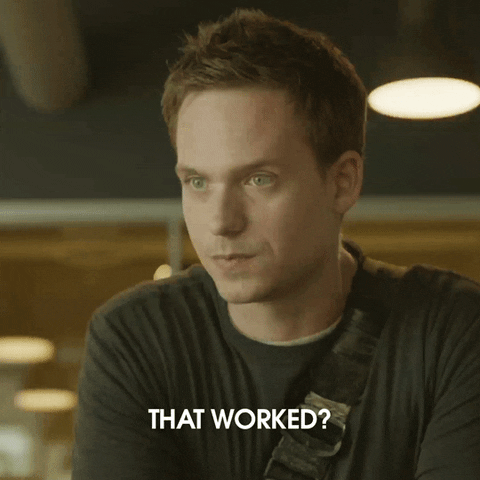

In [5]:
from IPython.display import Image
display(Image(r.content))

In [6]:
r = requests.get('https://raw.githubusercontent.com/michaelx/climate/master/climate.json', verify=False) # bij het waterschap
# is de SSL kapot, dus als je iets van een https-site wil halen moet je verify=False meegeven, je krijgt dan ook onderstaande
# lelijke melding
r.json()[0]

S:\WinPython 3.6\python-3.6.2.amd64\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'city': 'Amsterdam',
 'country': 'Netherlands',
 'id': 1,
 'monthlyAvg': [{'dryDays': 19,
   'high': 7,
   'low': 3,
   'rainfall': 68,
   'snowDays': 4},
  {'dryDays': 13, 'high': 6, 'low': 3, 'rainfall': 47, 'snowDays': 2},
  {'dryDays': 16, 'high': 10, 'low': 6, 'rainfall': 65, 'snowDays': 1},
  {'dryDays': 12, 'high': 11, 'low': 7, 'rainfall': 52, 'snowDays': 0},
  {'dryDays': 15, 'high': 16, 'low': 11, 'rainfall': 59, 'snowDays': 0},
  {'dryDays': 14, 'high': 17, 'low': 11, 'rainfall': 70, 'snowDays': 0},
  {'dryDays': 14, 'high': 20, 'low': 12, 'rainfall': 74, 'snowDays': 0},
  {'dryDays': 15, 'high': 20, 'low': 12, 'rainfall': 69, 'snowDays': 0},
  {'dryDays': 14, 'high': 17, 'low': 10, 'rainfall': 64, 'snowDays': 0},
  {'dryDays': 16, 'high': 14, 'low': 9, 'rainfall': 70, 'snowDays': 0},
  {'dryDays': 20, 'high': 9, 'low': 6, 'rainfall': 82, 'snowDays': 1},
  {'dryDays': 19, 'high': 7, 'low': 1, 'rainfall': 85, 'snowDays': 1}]}

<a id='json'></a>
[terug naar index](#index)
# json
```JSON```of JavaScript Object Notation, is een gestandaardiseerd gegevensformaat. ``JSON`` maakt gebruik van een door mens leesbare vorm met attributen en waarden. (een soort ```dictionary```) ```JSON``` wordt veel gebruikt in uitwisseling van data tussen servers en applicaties, het is een alternatief voor ```XML```. En wordt veel gebruikt in API's.  
  
Een ```JSON``` kan bestaan uit getallen, strings, letterlijke waardes (true, false, null), lists [waarde,..], en een soort dictionary {string: waarde, ...}.

``.json()`` zet een ``JSON`` om naar een combinatie van ``python`` ``lists`` en ``dictionaries``.

Hieronder een voorbeeld, met daarin een lijst met steden (als voorbeeld enkel de eerste 3), per stad zijn in ``dictionary`` vorm verschillende attributen en waarden weergegeven. ``monthlyAvg`` is weer een ``list`` met daarin ``dictionaries``.

In [7]:
r.json()[0:3]

[{'city': 'Amsterdam',
  'country': 'Netherlands',
  'id': 1,
  'monthlyAvg': [{'dryDays': 19,
    'high': 7,
    'low': 3,
    'rainfall': 68,
    'snowDays': 4},
   {'dryDays': 13, 'high': 6, 'low': 3, 'rainfall': 47, 'snowDays': 2},
   {'dryDays': 16, 'high': 10, 'low': 6, 'rainfall': 65, 'snowDays': 1},
   {'dryDays': 12, 'high': 11, 'low': 7, 'rainfall': 52, 'snowDays': 0},
   {'dryDays': 15, 'high': 16, 'low': 11, 'rainfall': 59, 'snowDays': 0},
   {'dryDays': 14, 'high': 17, 'low': 11, 'rainfall': 70, 'snowDays': 0},
   {'dryDays': 14, 'high': 20, 'low': 12, 'rainfall': 74, 'snowDays': 0},
   {'dryDays': 15, 'high': 20, 'low': 12, 'rainfall': 69, 'snowDays': 0},
   {'dryDays': 14, 'high': 17, 'low': 10, 'rainfall': 64, 'snowDays': 0},
   {'dryDays': 16, 'high': 14, 'low': 9, 'rainfall': 70, 'snowDays': 0},
   {'dryDays': 20, 'high': 9, 'low': 6, 'rainfall': 82, 'snowDays': 1},
   {'dryDays': 19, 'high': 7, 'low': 1, 'rainfall': 85, 'snowDays': 1}]},
 {'city': 'Athens',
  'countr

je kan in een ```JSON``` door middel van ```selection``` ``[]`` selecteren, recap bij een ``list`` gebruik je een integer ``index``, en bij een ``dictionary`` de ``key``.

In [8]:
r.json()[0]['monthlyAvg'][5] # Amsterdam, maandgemiddelde juni

{'dryDays': 14, 'high': 17, 'low': 11, 'rainfall': 70, 'snowDays': 0}

In [9]:
r.json()[1]['city']

'Athens'

```python``` kent ook een standaard package ```json```, met ```loads``` kan je een ``string`` inlezen naar een ``JSON``, waarbij het wordt omgezet in een combinatie van ``lists`` en ``dictionaries``. dit doet ``json()`` van request ook.

In [10]:
import json
json.loads(r.text)[0:3]

[{'city': 'Amsterdam',
  'country': 'Netherlands',
  'id': 1,
  'monthlyAvg': [{'dryDays': 19,
    'high': 7,
    'low': 3,
    'rainfall': 68,
    'snowDays': 4},
   {'dryDays': 13, 'high': 6, 'low': 3, 'rainfall': 47, 'snowDays': 2},
   {'dryDays': 16, 'high': 10, 'low': 6, 'rainfall': 65, 'snowDays': 1},
   {'dryDays': 12, 'high': 11, 'low': 7, 'rainfall': 52, 'snowDays': 0},
   {'dryDays': 15, 'high': 16, 'low': 11, 'rainfall': 59, 'snowDays': 0},
   {'dryDays': 14, 'high': 17, 'low': 11, 'rainfall': 70, 'snowDays': 0},
   {'dryDays': 14, 'high': 20, 'low': 12, 'rainfall': 74, 'snowDays': 0},
   {'dryDays': 15, 'high': 20, 'low': 12, 'rainfall': 69, 'snowDays': 0},
   {'dryDays': 14, 'high': 17, 'low': 10, 'rainfall': 64, 'snowDays': 0},
   {'dryDays': 16, 'high': 14, 'low': 9, 'rainfall': 70, 'snowDays': 0},
   {'dryDays': 20, 'high': 9, 'low': 6, 'rainfall': 82, 'snowDays': 1},
   {'dryDays': 19, 'high': 7, 'low': 1, 'rainfall': 85, 'snowDays': 1}]},
 {'city': 'Athens',
  'countr

omdat ```.json()``` van ```requests``` of ```.loads()``` van ```json``` het ``JSON`` bestand inleest naar ``lists`` en ``dictionaries`` kan je ook de ``methods`` van vorige week gebruiken.

In [11]:
r.json()[0].keys()

dict_keys(['id', 'city', 'country', 'monthlyAvg'])

In [12]:
r.json()[0].values()

dict_values([1, 'Amsterdam', 'Netherlands', [{'high': 7, 'low': 3, 'dryDays': 19, 'snowDays': 4, 'rainfall': 68}, {'high': 6, 'low': 3, 'dryDays': 13, 'snowDays': 2, 'rainfall': 47}, {'high': 10, 'low': 6, 'dryDays': 16, 'snowDays': 1, 'rainfall': 65}, {'high': 11, 'low': 7, 'dryDays': 12, 'snowDays': 0, 'rainfall': 52}, {'high': 16, 'low': 11, 'dryDays': 15, 'snowDays': 0, 'rainfall': 59}, {'high': 17, 'low': 11, 'dryDays': 14, 'snowDays': 0, 'rainfall': 70}, {'high': 20, 'low': 12, 'dryDays': 14, 'snowDays': 0, 'rainfall': 74}, {'high': 20, 'low': 12, 'dryDays': 15, 'snowDays': 0, 'rainfall': 69}, {'high': 17, 'low': 10, 'dryDays': 14, 'snowDays': 0, 'rainfall': 64}, {'high': 14, 'low': 9, 'dryDays': 16, 'snowDays': 0, 'rainfall': 70}, {'high': 9, 'low': 6, 'dryDays': 20, 'snowDays': 1, 'rainfall': 82}, {'high': 7, 'low': 1, 'dryDays': 19, 'snowDays': 1, 'rainfall': 85}]])

<a id='ex1'></a>
[terug naar index](#index)
# exercise 1
Bepaal de neerslag jaarsom van Amsterdam. (hint: gebruik ```pandas```)

^ 805 mm

Doe hetzelfde voor Tokyo.

^ 1342.8

Hoeveel Spaanse steden zitten er in de ```JSON```?

^ 5

<a id='ex2'></a>
[terug naar index](#index)
# exercise 2

Om wat te oefenen met ``requests`` en api's gaan we ```OMDb API``` gebruiken, deze API bevat informatie over films. Bekijk de [documentatie](http://www.omdbapi.com/). En zoek de laatste film op waar je naartoe bent geweest. Wat was de IMDb score? (hint: gebruik ``get``)

In [ ]:
API_KEY = '2bf1b169'
url = 'http://www.omdbapi.com/?apikey=%s&' % (API_KEY)

Maak een functie ```get_film_by_title```. Die voor de parameter ```title```, ofwel de filmtitel, de geparste json terug geeft.

Maak een functie ```return_runtime_by_title```. Die voor de parameter ```title```, de Runtime teruggeeft. Test het op 'The Matrix'.

^ 136 min

<a id='requests2'></a>
[terug naar index](#index)
# requests, continued
```get``` van ```request``` kent ook het keyword ```params```. met ```params``` kan je met een ```dictionary``` een request opbouwen, ``params`` vertaald je ``dictionary`` naar bijbehorende url (standaard opbouw), ``key`` is de parameter, ``value`` de waarde.

In [ ]:
import requests
r = requests.get(url, params={'t': 'The Shawshank Redemption', 'year': '1994'})
r.json()

In [ ]:
r.url

<a id='ex3'></a>
[terug naar index](#index)
# exercise 3
Bouw een functie ``get_movie``, met de parameters ``title``, ``year`` en ``type``. Je functie moet ook werken als er bijv. alleen een titel wordt meegegeven. Return de hele geparste ``JSON``.

<a id='knmi'></a>
[terug naar index](#index)
# knmi api
de [KNMI API](https://www.knmi.nl/kennis-en-datacentrum/achtergrond/data-ophalen-vanuit-een-script), hiermee kan je daggegevens van de automatische stations en neerslagstations ophalen. en uurgegevens van sommige parameters van de automatische stations. de API geeft het standaard KNMI formaat terug, wat verschrikkelijk is, dus het inlezen is altijd een gedoe.

In het algemeen worden de volgende parameters herkend (gekopieerd van documentatie), voor specifieke parameters per API kijk naar de [documentatie](https://www.knmi.nl/kennis-en-datacentrum/achtergrond/data-ophalen-vanuit-een-script):

- ``start``, De volledige datum (start) in het format YYYYMMDD. Default is de eerste dag van de huidige maand.
- ``end``, De volledige datum (end) in het format YYYYMMDD. Default is de huidige dag (of de laatste dag waarvoor data aanwezig is).
- ``inseason`` Wanneer deze variabele ingevuld is, worden van elk jaar tussen begin- en einddatum alleen de dagen geselecteerd die binnen het seizoen (bday,bmonth)-(eday,emonth) vallen. Bijvoorbeeld, als inseason=Y en de begin- en einddatum zijn respectievelijk 19731101 en 20030303, dan bevat de uitvoer alleen de dagen tussen deze twee data die in de periode 1 november t/m 3 maart vallen, terwijl 19730406 en 20080406 alle 6-aprils in de jaren 1973 t/m 2008 opleveren.
- ``vars`` Lijst van gewenste variabelen in willekeurige volgorde, aangeduid met hun acroniemen (zoals op de selectiepagina) gescheiden door ':', bijvoorbeeld 'TG:TN:EV24'. Hierin zijn de volgende acroniemen gedefiniëerd om groepen van variabelen aan te duiden:
    - WIND = DDVEC:FG:FHX:FHX:FX wind
    - TEMP = TG:TN:TX:T10N temperatuur
    - SUNR = SQ:SP:Q Zonneschijnduur en globale straling
    - PRCP = DR:RH:EV24 neerslag en potentiële verdamping
    - PRES = PG:PGX:PGN druk op zeeniveau
    - VICL = VVN:VVX:NG zicht en bewolking
    - MSTR = UG:UX:UN luchtvochtigheid
    - ALL alle variabelen (default)
- ``stns`` Lijst van gewenste stations (nummers) in willekeurige volgorde, gescheiden door ':'. Geen default waarde; Stations móeten zijn gespecificeerd. ALL staat voor álle stations.

De beginurls zijn:
- http://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi voor de dagdata van de automatische stations;
- http://projects.knmi.nl/klimatologie/monv/reeksen/getdata_rr.cgi voor de dagdata van de neerslagstations;
- http://projects.knmi.nl/klimatologie/uurgegevens/getdata_uur.cgi voor de uurdata van de automatische stations

hieronder een voorbeeld waar we de neerslagvars (```PRCP```) binnenhalen voor Gilze-Rijen (```350```), van 1 januari 2018 tot nu. je heb ``StringIO`` nodig om de text die terug wordt gegeven te parsen (er zitten ``\n`` en ``\r`` in etc.). knmi heeft een verschrikkelijk formaat, de header met informatie heeft een # voor elke regel. we moeten een trucje uithalen om de kolomnamen binnen te halen, deze zijn ook gecomment met #. dit doe ik hieronder met een ``list comprehension``.

In [14]:
from io import StringIO
import pandas as pd

url_dag = 'http://projects.knmi.nl/klimatologie/daggegevens/getdata_dag.cgi'
params = {'start': '20180101', 'vars': 'PRCP', 'stns': '350'}

r = requests.get(url_dag, params=params)
columnnames = [column.strip() for column in StringIO(r.text).read().split("#")[-2].split(',')] # split op comment #, pak de
# een-na-laatste dit zijn de kolomnamen, split weer met komma, en strip() de kolomnamen van spaties en /r/n
pd.read_csv(StringIO(r.text), comment='#', sep=',', names=columnnames, parse_dates=[1], index_col=[1])

,STN,DR,RH,RHX,RHXH,EV24
YYYYMMDD,,,,,,
2018-01-01,350,75,85,18,16,3
2018-01-02,350,71,39,6,22,2
2018-01-03,350,32,103,64,3,1
2018-01-04,350,25,14,5,12,1
2018-01-05,350,36,85,52,16,2
...,...,...,...,...,...,...
2019-11-20,350,0,0,0,1,6
2019-11-21,350,0,0,0,1,3
2019-11-22,350,7,5,5,7,6


<a id='ex4'></a>
[terug naar index](#index)
# exercise 4
Haal de gehele neerslagreeks van het neerslagstation Chaam binnen ```834```. Lees deze in naar een ```DataFrame``` met als ```index``` de datum (natuurlijk als DateTime object). Om het handig te maken heeft dit bestand weer geen comments... Kijk naar de foutmelding van ```read_csv``` waar het foutgaat... (```skiprows```?)

Geef de verschillende statistieken (``describe``) voor de neerslagsom (```RD```) per maand (``groupby``) in mm over alle jaren voor station Chaam.

^
  
|   YYYYMMDD |   count |    mean |     std |   min |   25% |   50% |    75% |   max |
|-----------:|--------:|--------:|--------:|------:|------:|------:|-------:|------:|
|          1 |      69 | 69.7783 | 31.5334 |   3.1 | 49.5  | 71    |  87.2  | 148   |
|          2 |      69 | 53.671  | 27.72   |   1.6 | 31.2  | 55.6  |  73.5  | 137.1 |
|          3 |      69 | 59.6087 | 29.458  |   5.2 | 38.3  | 55.4  |  78.7  | 133.2 |
|          4 |      69 | 46.2971 | 28.0235 |   0   | 23.6  | 39.9  |  63.7  | 124.9 |
|          5 |      69 | 58.4116 | 30.2682 |   3.2 | 34.4  | 52.1  |  75.6  | 136.7 |
|          6 |      69 | 70.0348 | 34.4038 |   3.6 | 43.9  | 64.6  |  91.2  | 149.8 |
|          7 |      69 | 78.7159 | 39.2226 |   2   | 45.3  | 79.9  | 109.7  | 166.1 |
|          8 |      69 | 75.4145 | 38.4923 |  12.6 | 47.8  | 72.7  |  97.8  | 209.5 |
|          9 |      69 | 69      | 44.168  |   5.1 | 35.9  | 60.6  |  92    | 214.3 |
|         10 |      69 | 72.0261 | 36.166  |   5.2 | 48    | 69.9  |  86.5  | 162.9 |
|         11 |      68 | 74.1    | 32.1221 |   9   | 47.95 | 76.1  |  91.5  | 168.9 |
|         12 |      68 | 76.9794 | 37.8252 |  12   | 52.55 | 68.15 | 103.65 | 172.9 |

gelukkig zijn er mensen die ook al packages hebben geschreven op de knmi api te gebruiken en direct om te schrijven naar een ```DataFrame```, zoals ```knmi``` dat is bij ons geinstalleerd.

In [ ]:
import knmi
knmi.get_day_data_dataframe(['350'], start='20180101')

<a id='kiwis'></a>
[terug naar index](#index)
# kiwis api
``KIWIS`` is de API van ons WIS systeem: WISKI, hierin worden onze tijdsreeksen opgeslagen. de API is enkel te benaderen vanaf het interne netwerk. dit is het [startpunt](http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices) van de API. de [documentatie](http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices&request=getrequestinfo) van KIWIS is redelijk goed, dus pak die erbij als je een query maakt.

de documentatie is opgebouwd uit: 
- ```queryfields```, deze parameters kan je gebruiken om een selectie te maken;
- ```formats```, de formaten die teruggegeven kunnen worden;
- ```returnfields```, met de parameter ```returnfields``` kan je verder specificeren wat de API teruggeeft;
- ```optional fields```, met overige settings;

onderaan vind je een paar voorbeelden, voor ```localhost``` moet je invullen ```10.10.3.126```.

hieronder een paar voorbeelden, om het voor jezelf overzichtelijk te houden gebruik het ``keyword`` ```params``` in ``get``.

In [15]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'getsitelist', 'format': 'json'}
r = requests.get(url, params=params)
pd.DataFrame(r.json()[2:12], columns=r.json()[0]) # eerste 10 sites in WISKI, eerste rij zijn de kolomnamen (r.json()[0])

,site_id,site_name,site_no
0,48290,'s Gravenmoer,ZRG00061
1,36136,'t Merkske Voster Schoor,5368
2,76447,'t Schof/Balrouwse Vaart Hoeven,KST01200
3,0,---,0
4,56505,1e Dwarsbaan,LOZ0782
5,75866,1e Kruisweg/Molendijk stuw Standdaardbuiten,KST02225
6,75875,1e Kruisweg/Rijksweg A17 stuw Standdaarbuiten,KST01218
7,104576,6999 herbenoem test,AKN77777
8,31883,A M de Jongstraat 32 Zegge,3039
9,76453,A-B Weg Hoeven,KST01163


In [16]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'getsitelist', 'format': 'json', 'site_name': '*stuw*'} # * is wildcard
r = requests.get(url, params=params)
pd.DataFrame(r.json()[2:12], columns=r.json()[0]) # eerste 10 sites met in de naam stuw

,site_id,site_name,site_no
0,75875,1e Kruisweg/Rijksweg A17 stuw Standdaarbuiten,KST01218
1,76822,Afgebrande Hoef stuw Zevenbergen,KST02147
2,75889,Annadijk stuw Dinteloord,KST00111
3,11960,Antoniegorzen stuw Heijningen VL4,8061
4,75942,Antoniegorzen stuw Willemstad,KST01077
5,11479,Audax stuw Gilze,KST00456
6,76583,Berkenstraat / Oosteind Lopstuw.,KST02014
7,11658,Blaaksedijk stuw Fijnaart VL27,8084
8,76579,Bogers Oosteind(LOPstuw),KST00739
9,11638,Brugweg stuw Kruisland C7,8043


In [17]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'getsitelist', 'format': 'json', 'site_name': '*stuw*', 'returnfields': ','.join(['site_no', 'site_name', \
                                                                                              'site_latitude', 'site_longitude'])}
r = requests.get(url, params=params)
pd.DataFrame(r.json()[2:12], columns=r.json()[0]) # eerste 10 sites met in de naam stuw & returnfields

,site_no,site_name,site_latitude,site_longitude
0,KST01218,1e Kruisweg/Rijksweg A17 stuw Standdaarbuiten,51.6234160506096,4.51917815414036
1,KST02147,Afgebrande Hoef stuw Zevenbergen,51.6294124871846,4.60468367309304
2,KST00111,Annadijk stuw Dinteloord,51.6342520238437,4.32068181151439
3,8061,Antoniegorzen stuw Heijningen VL4,51.6837886443874,4.41322220576914
4,KST01077,Antoniegorzen stuw Willemstad,51.6832741035563,4.41404308692982
5,KST00456,Audax stuw Gilze,51.5559374548367,4.95394095956662
6,KST02014,Berkenstraat / Oosteind Lopstuw.,51.6372852649709,4.91008722765077
7,8084,Blaaksedijk stuw Fijnaart VL27,51.6254293007743,4.4870201365277
8,KST00739,Bogers Oosteind(LOPstuw),51.6336253063655,4.88815596479928
9,8043,Brugweg stuw Kruisland C7,51.567435544061,4.38788103303489


wat ```WISKI``` basis, een ```site``` bestaat uit ```stations```, welke weer ```timeseries``` bevat, deze hebben een ``ts_id`` unieke identifier per reeks en daarmee kan je de waarden van de reeks ophalen.

``site`` {site} -> meerdere ``stations`` (zoals bijv. waterstand bovenstrooms {site}_WTH_BOV, waterstand benedenstrooms {site}_WTH_BEN, klepstand {site}_KKL) -> meerdere ``timeseries`` (zoals bijv. dag gemiddelde, Continuereeks etc.) -> elke ``timeseries`` van een ``station`` heeft een ``ts_id``.

om dat te illustreren hieronder een voorbeeld voor de ``site`` -> 'Brooijmans' het gemaal in Kruislandse Kreken.

In [18]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'getsitelist', 'format': 'json', 'site_name': '*Brooijmans*'} 
r = requests.get(url, params=params)
pd.DataFrame(r.json()[1:], columns=r.json()[0]) # een site met site_no 7131

,site_id,site_name,site_no
0,11597,Brooijmans Steenbergen Poldergemaal,7131


In [19]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'getstationlist', 'format': 'json', 'site_name': 'Brooijmans*'} 
r = requests.get(url, params=params)
stations = pd.DataFrame(r.json()[1:], columns=r.json()[0]) # met meerdere stations, bijv. de pompen, waterstanden, en debieten
stations # stations met station_no 7131_WTH_IN etc.

,station_name,station_no,station_id,station_latitude,station_longitude
0,Instroomzijde,7131_WTH_IN,13678,51.5931482711693,4.37265165657919
1,Pomp 1,7131_PMP1,13673,51.5931482711693,4.37265165657919
2,Pomp 2,7131_PMP2,13674,51.5931482711693,4.37265165657919
3,Totaaldebiet,7131_TDB,13677,51.5931482711693,4.37265165657919
4,Uitstroomzijde,7131_WTH_UIT,13676,51.5930913645429,4.37278939947721
5,Vuilvang 1,7131_KVV1,13672,51.5931482711693,4.37265165657919
6,Vuilvang 2,7131_KVV2,13675,51.5931482711693,4.37265165657919


In [20]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'gettimeserieslist', 'format': 'json', 'station_no': '7131_TDB'} # hier kan je site_name niet meer gebruiken
# als query
r = requests.get(url, params=params)
pd.DataFrame(r.json()[1:], columns=r.json()[0]) # een station_no met timeseries, verschillende aggregaties en niveaus & eenheden

,station_name,station_no,station_id,ts_id,ts_name,parametertype_id,parametertype_name
0,Totaaldebiet,7131_TDB,13677,16708042,ContinueMeting.P,11168,WNS2367
1,Totaaldebiet,7131_TDB,13677,16710042,Jaar.Min,11168,WNS2367
2,Totaaldebiet,7131_TDB,13677,17945042,DagGem.mm/d,23745,WNS9996
3,Totaaldebiet,7131_TDB,13677,16711042,ContinueMeting.O,11168,WNS2367
4,Totaaldebiet,7131_TDB,13677,37391042,Uur.Gem,11168,WNS2367
5,Totaaldebiet,7131_TDB,13677,17943042,DagGem.l/s/ha,23747,WNS9997
6,Totaaldebiet,7131_TDB,13677,17944042,JaarGem.l/s/ha,23747,WNS9997
7,Totaaldebiet,7131_TDB,13677,16709042,Jaar.Gem,11168,WNS2367
8,Totaaldebiet,7131_TDB,13677,16712042,Jaar.Max,11168,WNS2367
9,Totaaldebiet,7131_TDB,13677,16714042,Maand.Gem,11168,WNS2367


In [21]:
url = 'http://10.10.3.126:8080/KiWIS/KiWIS?datasource=0&service=kisters&type=queryServices'
params = {'request': 'gettimeseriesvalues', 'format': 'json', 'ts_id': '16713042'} # enkel ts_id kan je hier als query gebruiken
# om te reeks te selecteren, je kan ook nog periode die je wil meegeven, als je niks meegeeft krijg je de laatste meting terug
r = requests.get(url, params=params)
pd.DataFrame(r.json()) # meting behorende bij ts_id

,ts_id,rows,columns,data
0,16713042,1,"Timestamp,Value","[[2019-11-24T00:00:00.000+01:00, 0.505]]"


<a id='kiwisex'></a>
[terug naar index](#index)
# exercise KIWIS
Haal de ``Dag.Gem`` ``Totaaldebiet`` reeks van ``Blauwe Kamer`` binnen van de afgelopen 10 jaar. Maak er een ``DataFrame``  van met een ``DateTimeIndex``.

Haal de eerste 10 ``Dag.Gem`` Peilbuizen meetreeksen binnen, van de afgelopen 3 jaar. Maak er een ``DataFrame`` van met een ``DateTimeIndex`` en in de kolommen de metingen, maak de kolomnaam gelijk aan het ``station_no``. (hint: ``merge``?)

Haal alle waterstandmeetreeksen in WISKI binnen in het KRW-stroomgebied van de Aa of Weerijs. Gebruik daarvoor ``data/krwaaofweerijs.shp``, lees deze in als ``GeoDataFrame``. Haal daarna alle metadata binnen van de waterstandsmetingen, zet deze om naar een ``GeoDataFrame``, let op ze moeten dezelfde projectie hebben (het stroomgebied is in RD (``'epsg:28992'``)). Je kan punten aanmaken in de ``geometry`` met ``[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]``. 

In [ ]:
import geopandas as gpd # geopandas inladen
from shapely.geometry import Point # point om de geometry aan te maken
stroomgebied = 
meta = 

Gebruik ``.within()`` om de meetpunten in het krw stroomgebied van de Aa of Weerijs te selecteren, ```within``` moet je toepassen op de ```geometry``` van de ```GeoDataFrames```. 

In [ ]:
within_stroomgebied = 

Haal alle ``Dag.Gem`` meetreeksen binnen voor de geselecteerde meetpunten. Maak de kolomnaam weer gelijk aan het ``station_no``, gebruik een ``DateTimeIndex``.

<a id='hydronet'></a>
[terug naar index](#index)
# HydroNET API
de HydroNET API (ofwel hydro.dommel.nl) bevat informatie uit WISKI, ZICHT, IRIS & AQUO (en daarnaast ook data van de Dommel & Aa en Maas). de [documentatie](http://hydro.dommel.nl/) is hier terug te vinden, deze is niet geweldig en je zal het vooral met de voorbeelden uit de documentatie moeten doen.

dws.api?request=[```requestname```]&format=[```format```][&```parameters```]dit is de standaard url bevraging,

### requestnames
de ```requestnames``` die gebruikt kunnen worden zijn:
- GetDwsLog	Return the dws log table from the dws database	
- GetRequestLog	Return the request log table from the dws database
- GetUpdateStatusLog	Return the update status log table from the dws database	
- GetStatus	Return the status table from the dws database	
- GetDataSources	Return the DataSources configured in the DWS	
- GetLocations	Return the Locations configured for a specific theme in the DWS	
- GetGeoLocations	Return the Locations based on some EPSG configured in the DWS	
- GetParameterGroups	Return the parameter groups configured in the DWS	
- GetParameters	Return the parameters based on a theme configured in the DWS	
- GetThmeCategories	Return the theme categories configured in the DWS	
- GetThemes	Return the themes configured in the DWS	
- GetTimeseries	Return the timeseries configured in the DWS	
- GetData	Get data from the source system and return it	
- GetDataCalc	Get data from the source system, perform an operation on the data and return it	

### formats
de ```formats``` die gebruikt kunnen worden zijn:
- xml
- html
- json
- jsonp
- jsont (Json returned as html)
- csv

### parameters
selectie van de ```parameters``` die gebruikt kunnen worden:
- datasource=[id]
- search=[code/name/description query]
- startdate=[yyyymmddhhmm]
- enddate=[yyyymmddhhmm]
- parameter=[parameter id's], parcode=[parameter code str]
- parametergroups=[parametergroup id]
- locations=[location id's]
- locationcodes=[location codes]
- timeserie=[timeserie id]
- timeseries=[timeserie id's]

In [ ]:
import requests
url = 'http://hydro.dommel.nl/dws.api?'

params = {'request': 'getthemes', 'format': 'json'}
r = requests.get(url, params=params)
r.json()

In [ ]:
import pandas as pd
pd.DataFrame(r.json()['Data'])

In [ ]:
params = {'request': 'getdatasources', 'format': 'json'}
r = requests.get(url, params=params)
pd.DataFrame(r.json()['Data'])

In [ ]:
r.url

In [ ]:
params = {'request': 'getgeolocations', 'format': 'json', 'theme': 1}
r = requests.get(url, params=params)
all_locations = pd.DataFrame(r.json()['Data']) # alle geolocaties voor het thema water kwaliteit
all_locations

In [ ]:
all_locations[all_locations.Name.str.contains('Tonnekreek')]

In [ ]:
params = {'request': 'getparameters', 'format': 'json', 'theme': 1, 'parcode': 'Ntot[mg/l][N][OW]'}
r = requests.get(url, params=params)
pd.DataFrame(r.json()['Data'])

In [ ]:
params = {'request': 'getdata', 'format': 'json', 'theme': 1, 'parcode': 'Ntot[mg/l][N][OW]', 'loccode': '790401', \
          'startdate': '201801010000', 'enddate': '201910010000', 'timeserie': 42} # loccode met WSBDID of loc met LocationID
r = requests.get(url, params=params)
r.text
pd.DataFrame(r.json()['Data'])

In [ ]:
pd.DataFrame(r.json()['Data'][0]['Values'])

Grote probleem bij HydroNET API is, je moet echt weten welke parameter je wil hebben, welke locatie etc. Dat maakt het gebruik wat omslachtig, er is geen overzicht met daarin waar welke parameters worden gemeten. Maar daar kunnen we misschien wel brute force iets op verzinnen, zie opdracht hieronder. Hij is wel ietsje lastiger...

<a id='hydronetex'></a>
[terug naar index](#index)
# exercise hydronet - waterkwaliteit


Lees ``data/krwaaofweerijs.shp`` in met ``geopandas``, dit is het krw stroomgebied van de Aa of Weerijs. En haal met de ``HydroNET-API`` alle geolocaties van het waterkwaliteitthema binnen, maak van de geolocaties een ``GeoDataFrame``. Je kan ```pd.concat([locations, pd.DataFrame([x[0] for x in locations['Projections']])], axis=1)``` gebruiken om de ```Projections``` kolom 'uit te pakken'. Zet de projectie ```crs``` naar ``'epsg:28992'``. Om de punten (x,y) in te laden naar de ``geometry``  kan je gebruik maken van ``[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]``.

In [ ]:
import geopandas as gpd # geopandas inladen
from shapely.geometry import Point # point om de geometry aan te maken
stroomgebied = 
meta = 

Gebruik ``.within()`` om de meetpunten in het krw stroomgebied van de Aa of Weerijs te selecteren, ```within``` moet je toepassen op de ```geometry``` van de ```GeoDataFrames```. 

Kijk voor al deze meetpunten (gebruik alleen de unieke ``Code``) of er reeksen zijn van Stikstof Totaal (``Ntot[mg/l][N][OW]``). Lees de meetreeks in als je ```DataFrame``` niet ``empty`` is. Je ```DataFrame``` enkel de kolom ``'Values'`` te bevatten, maak van de index een ``DateTimeIndex``. Zet de kolomnaam (df.columns = [kolomnaam]) gelijk aan de ``'Code'`` van het meetpunt. ``merge`` voor alle meetpunten de reeksen aan elkaar.
Bepaal de gemiddelde concentratie van alle meetpunten per maand over alle jaren.

^  
  
|   Date | Ntot (mg/l) |
|-------:|---------:|
|      1 | 24.7833  |
|      2 |  8.08074 |
|      3 | 15.1619  |
|      4 |  8.96428 |
|      5 | 19.4139  |
|      6 |  5.8413  |
|      7 | 14.5883  |
|      8 |  4.97162 |
|      9 |  4.92305 |
|     10 |  6.33352 |
|     11 | 13.4333  |
|     12 |  8.67037 |

``merge`` de gemiddelde concentratie Stikstof totaal aan het ``GeoDataFrame`` met daarin de meetpunten in de Aa of Weerijs. Noem het ``DataFrame`` ``gemNtotaafoweerijs``, de kolom met daarin de gemiddelde stikstof concentraties ``Ntot (mg/l)``, en run de cel eronder, en bekijk wat voor moois je hebt gemaakt. Volgende week meer daarover!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

%matplotlib inline

cmap = ListedColormap(sns.color_palette('rainbow', 10).as_hex()) # discrete colormap
fig, ax = plt.subplots(figsize=(11,9), dpi=500) # figuur aanmaken
stroomgebied.plot(ax=ax, alpha=0.5, color='lightgrey') # ondergrond stroomgebied plotten
ax.set_title('Gemiddelde concentratie Stikstof totaal (mg/l)\nper meetpunt in KRW-stroomgebied van de Aa of Weerijs') # titel
gemNtotaafoweerijs.plot(column=['Ntot (mg/l)'], figsize=(11,9), legend=False, vmin=0, vmax=10, markersize=24, ax=ax, cmap=cmap)
scatter = ax.collections[1] # je plot met Ntot ophalen
plt.colorbar(scatter, ax=ax, extend='max', shrink=0.5) # colorbar toevoegen (kan ook met legend=True) maar die is enorm groot
ax.axis('off') # geen assen
fig.tight_layout() # alles iets dichter bij elkaar zette
for x, y, label in zip(merged.geometry.x, merged.geometry.y, merged['Ntot (mg/l)'].round(1)): # waarde erbij zetten
    ax.annotate(label, xy=(x, y), xytext=(4, 4), textcoords="offset points")